# **Fish Freshness Detection using Deep Learning (Convolutional Neural Network)**

**Nama Anggota Kelompok 06**
1. Komang Satya Dharmawan - 2105551143
2. I Gede Surya Mahardika - 2105551144
3. I Dewa Gede Wirama Putra - 2105551151

## Import Library

In [ ]:
import os
import random
import numpy as np
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
from PIL import Image

from google.colab import drive
from google.colab import files

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


## Data Preparation

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

source_path = '/content/drive/MyDrive/Dataset'
dest_path = '/content/Dataset'

# Copy entire folder
shutil.copytree(source_path, dest_path)

'/content/Dataset.zip'

In [ ]:
root_path = '/content/'
source_path = '/content/'
freshness_data_source_path = os.path.join(source_path, 'Dataset')

## Data Preprocessing

### Data Cleaning & Data Validation

#### Create New Dataset Directories

In [ ]:
def create_train_val_dir(root_path):
    freshness_training_fish_paths = {}
    freshness_validation_fish_paths = {}

    dataset_dir = os.path.join(root_path, 'Dataset')
    freshness_dir = os.path.join(dataset_dir, 'Freshness')

    if clean_dataset==True and os.path.exists(freshness_dir)==True :
        shutil.rmtree(freshness_dir)

    freshness_training_dir = os.path.join(freshness_dir, 'training')
    freshness_validation_dir = os.path.join(freshness_dir, 'validation')

    freshness_fresh_training_dir = os.path.join(freshness_training_dir, 'fresh')
    freshness_fresh_validation_dir = os.path.join(freshness_validation_dir, 'fresh')

    freshness_nonfresh_training_dir = os.path.join(freshness_training_dir, 'non fresh')
    freshness_nonfresh_validation_dir = os.path.join(freshness_validation_dir, 'non fresh')

    freshness_training_fish_paths['training_fresh_dir'] = freshness_fresh_training_dir
    freshness_training_fish_paths['training_nonfresh_dir'] = freshness_nonfresh_training_dir
    freshness_validation_fish_paths['validation_fresh_dir'] = freshness_fresh_validation_dir
    freshness_validation_fish_paths['validation_nonfresh_dir'] = freshness_nonfresh_validation_dir

    if clean_dataset == False:
        print("Directory already exist! using existing directory! SET 'clean_dataset=True' to remake the directories.")
        pass
    else:
        os.makedirs(freshness_fresh_training_dir)
        os.makedirs(freshness_fresh_validation_dir)
        os.makedirs(freshness_nonfresh_training_dir)
        os.makedirs(freshness_nonfresh_validation_dir)

    return freshness_training_dir, freshness_validation_dir, freshness_training_fish_paths, freshness_validation_fish_paths


In [ ]:
clean_dataset = True

# Create Datasets Directory, Scan and Save Paths for copy_split_shuffle_data and train_val_generator
freshness_training_dir, freshness_validation_dir, freshness_training_fish_paths, freshness_validation_fish_paths = create_train_val_dir(root_path=root_path)

Directory already exist! using existing directory! SET 'clean_dataset=True' to remake the directories.


#### Scan and Copy Data to New Directories

In [ ]:
# Copy Split and Shuffle data from Source Directory to Datasets Directory
def copy_split_shuffle_data(freshness_data_source_path, freshness_training_fish_paths, freshness_validation_fish_paths, split_size):
    files=[]
    pathsep		= "\\"
    freshness_data = {}

    try:
        for path, dirs, files in os.walk(freshness_data_source_path):
            for file in files:
                sep_file = os.path.join(path, file)

                if os.path.getsize(sep_file) > 0:
                    key = path.split(pathsep)[len(path.split(pathsep))-1].lower().replace(' ', '_') + "_train_dir".lower()
                    if key in freshness_data:
                        freshness_data[key].append(sep_file)
                    else:
                        freshness_data[key] = [sep_file]
                else:
                    print(f"File has no weight: {file}. IGNORING!")
    except Exception as e:
        print(f"An error occurred: {e}")

    try:
        for files_list, train_path, val_path in zip (freshness_data.values(), freshness_training_fish_paths.values(), freshness_validation_fish_paths.values()):
            print(files_list)
            print(train_path)
            print(val_path)

            if train_path is not None and val_path is not None:
                random.shuffle(files_list)

                split_point = int(len(files_list) * split_size)

                train_files = files_list[:split_point]
                val_files = files_list[split_point:]

                for file in train_files:
                    filename = os.path.basename(file)
                    dest_file = os.path.join(train_path, filename)
                    shutil.copyfile(file, dest_file)
                    print(f"Filename: {filename} copied from {file} to {dest_file} (Train)")

                for file in val_files:
                    filename = os.path.basename(file)
                    dest_file = os.path.join(val_path, filename)
                    shutil.copyfile(file, dest_file)
                    print(f"Filename: {filename} copied from {file} to {dest_file} (Validation)")

            else:
                print(f"No destination path found for class: . Skipping copying.")

    except Exception as e:
        print(f"An error occurred during file copying: {e}")


In [ ]:
# Copy Split and Shuffle Data from Source to Datasets
SPLIT_SIZE = 0.8
copy_split_shuffle_data(freshness_data_source_path, freshness_training_fish_paths, freshness_validation_fish_paths, SPLIT_SIZE)

['Raw Data\\Freshness\\Fresh\\20200517_084015.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084054.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084316.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084329.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084357.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084411.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084438.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084451.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084532.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084549.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084637.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084646.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084741.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084800.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084906.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_084923.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_085236.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_085301.jpg', 'Raw Data\\Freshness\\Fresh\\20200517_085331.jpg', 'Raw Data\\Freshness\\Fresh\\2

### Data Augmentation `(ImageDataGenerator)`

In [ ]:
# ImageDataGenerator to Augment Images (Prevent Overfitting)
def train_val_generator(train_dir, val_dir):

    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=20,
                                    height_shift_range=30,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    brightness_range=(0.5, 1.5),
                                    vertical_flip=True,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    zoom_range=0.2,
                                    vertical_flip=True,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

    train_generators = train_datagen.flow_from_directory(
                            directory=train_dir,
                            target_size=(250,250),
                            batch_size=64,
                            class_mode='binary',
                        )

    val_generators = val_datagen.flow_from_directory(
                            directory=val_dir,
                            batch_size=32,
                            class_mode='binary',
                            target_size=(250, 250)
                        )

    return train_generators, val_generators


In [ ]:
# ImageDataGenerator to Prevent Overfitting
train_generators, val_generators = train_val_generator(freshness_training_dir, freshness_validation_dir)

Found 3972 images belonging to 2 classes.
Found 994 images belonging to 2 classes.


### Preview Augmented Images

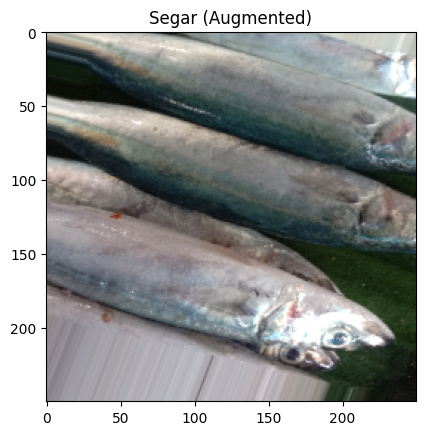

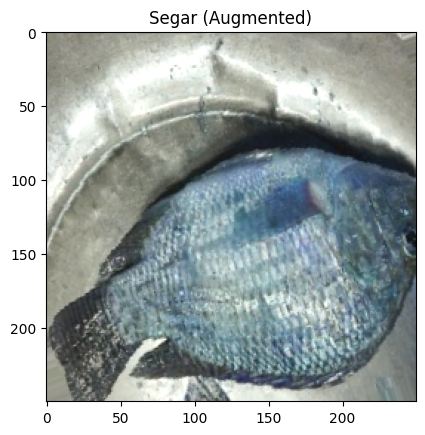

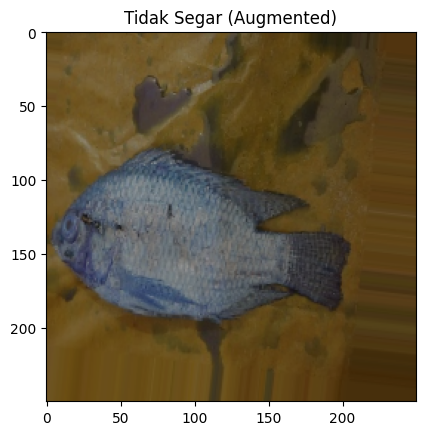

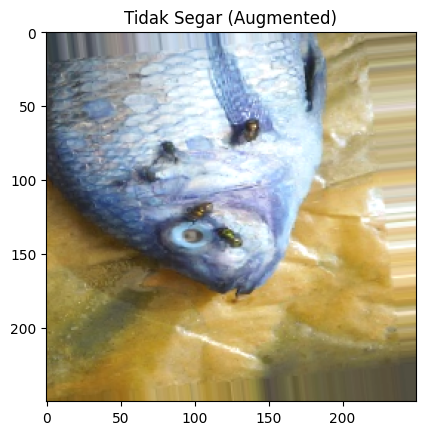

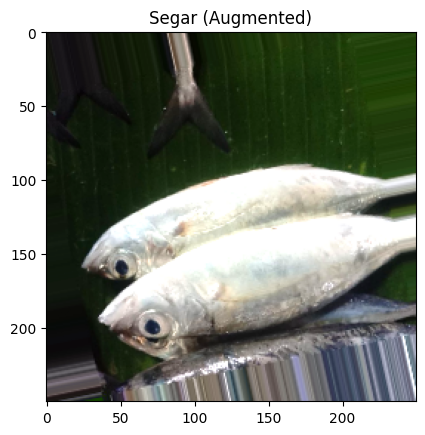

In [ ]:
x_batch, y_batch = next(train_generators)

for i in range (0,5):
    image = x_batch[i]
    if y_batch[i] == 0:
        title = "Segar (Augmented)"
    else:
        title = "Tidak Segar (Augmented)"
    plt.imshow(image)
    plt.title(title)
    plt.show()

## Neural Network Model


### Model Architecture

In [ ]:

# Build the Model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250,250,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


### Build Model

In [ ]:
# Build the Model
model = create_model()

### Model Training

In [ ]:
# Model Training
history = model.fit(train_generators, epochs=50, verbose=1, validation_data=val_generators, callbacks=[lrs_callback])

Epoch 1/50
63/63 [==============================] - 106s 2s/step - loss: 0.3048 - accuracy: 0.8865 - val_loss: 0.5485 - val_accuracy: 0.7435 - lr: 0.0010
Epoch 2/50
63/63 [==============================] - 101s 2s/step - loss: 0.2535 - accuracy: 0.9189 - val_loss: 0.5953 - val_accuracy: 0.6761 - lr: 0.0010
Epoch 3/50
63/63 [==============================] - 101s 2s/step - loss: 0.1800 - accuracy: 0.9449 - val_loss: 0.5868 - val_accuracy: 0.4879 - lr: 0.0010
Epoch 4/50
63/63 [==============================] - 99s 2s/step - loss: 0.1932 - accuracy: 0.9444 - val_loss: 0.5451 - val_accuracy: 0.8370 - lr: 0.0010
Epoch 5/50
63/63 [==============================] - 102s 2s/step - loss: 0.1640 - accuracy: 0.9446 - val_loss: 0.5175 - val_accuracy: 0.6791 - lr: 0.0010
Epoch 6/50
63/63 [==============================] - 107s 2s/step - loss: 0.1565 - accuracy: 0.9484 - val_loss: 0.4373 - val_accuracy: 0.7757 - lr: 0.0010
Epoch 7/50
63/63 [==============================] - 106s 2s/step - loss: 0.15

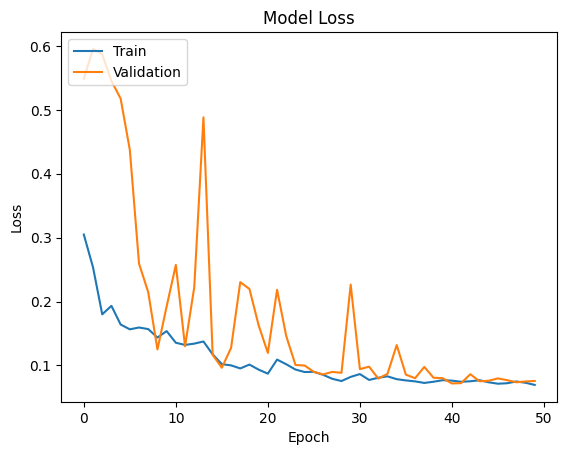

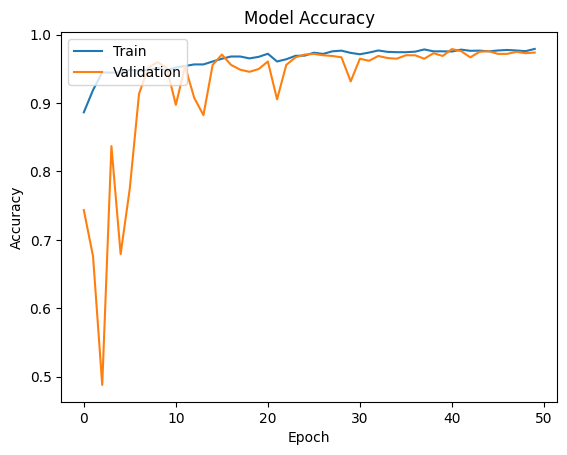

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Adding more Epochs
additional_epochs = 20
history = model.fit(train_generators, epochs=50 + additional_epochs, initial_epoch=50, validation_data=val_generators, callbacks=[lrs_callback])


Epoch 51/70
63/63 [==============================] - 101s 2s/step - loss: 0.0708 - accuracy: 0.9778 - val_loss: 0.0886 - val_accuracy: 0.9658 - lr: 1.6573e-05
Epoch 52/70
63/63 [==============================] - 101s 2s/step - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.0755 - val_accuracy: 0.9738 - lr: 1.4996e-05
Epoch 53/70
63/63 [==============================] - 102s 2s/step - loss: 0.0711 - accuracy: 0.9766 - val_loss: 0.0788 - val_accuracy: 0.9688 - lr: 1.3569e-05
Epoch 54/70
63/63 [==============================] - 102s 2s/step - loss: 0.0723 - accuracy: 0.9796 - val_loss: 0.0714 - val_accuracy: 0.9728 - lr: 1.2277e-05
Epoch 55/70
63/63 [==============================] - 100s 2s/step - loss: 0.0703 - accuracy: 0.9781 - val_loss: 0.0758 - val_accuracy: 0.9728 - lr: 1.1109e-05
Epoch 56/70
63/63 [==============================] - 100s 2s/step - loss: 0.0724 - accuracy: 0.9794 - val_loss: 0.0767 - val_accuracy: 0.9708 - lr: 1.0052e-05
Epoch 57/70
63/63 [===========================

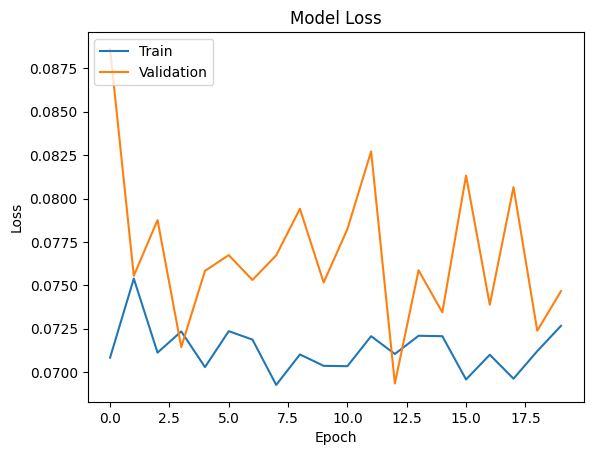

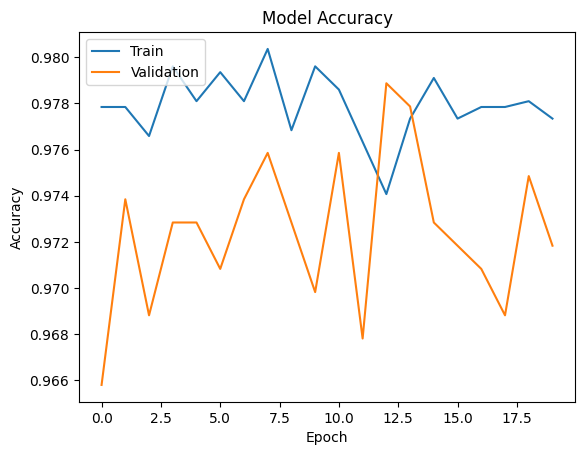

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Saving the Model
model.save('FishFreshness_3.h5')

### Evaluating Model

#### Evaluating Model : Testing Score

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


test_generators = test_datagen.flow_from_directory(
                        directory='Dataset/Freshness/validation',
                        batch_size=32,
                        class_mode='binary',
                        shuffle=False,
                        target_size=(250, 250)
                    )

Found 994 images belonging to 2 classes.


In [ ]:
# Predict probabilities
y_pred_prob = model.predict(test_generators)

# True labels
y_true = test_generators.classes

32/32 [==============================] - 16s 520ms/step


In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_true, y_pred_prob)
print(f"AUC Score: {auc_score}")

J = tpr - fpr
best_index = np.argmax(J)
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold}")
print(f"True Positive Rate at Best Threshold: {tpr[best_index]}")
print(f"False Positive Rate at Best Threshold: {fpr[best_index]}")

AUC Score: 0.9991034554321884
Best Threshold: 0.4205739498138428
True Positive Rate at Best Threshold: 0.9785202863961814
False Positive Rate at Best Threshold: 0.008695652173913044


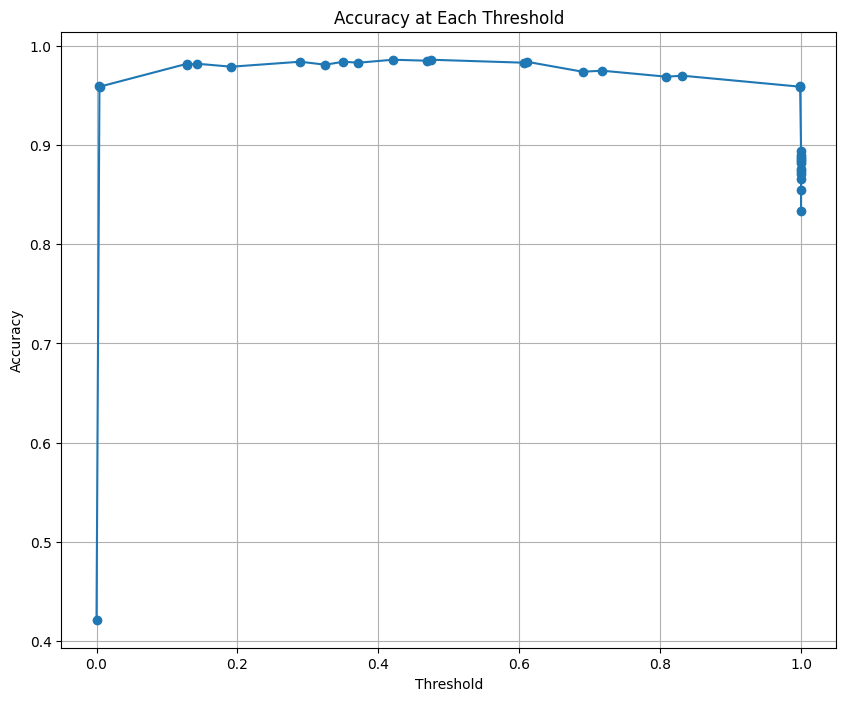

In [ ]:
# Initialize a list to hold accuracy values
accuracy_scores = []

# Calculate accuracy for each threshold
for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_scores.append(accuracy)

# Plot accuracy vs. thresholds
plt.figure(figsize=(10, 8))
plt.plot(thresholds, accuracy_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy at Each Threshold')
plt.grid(True)
plt.show()

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

print("Testing Accuracy")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

Testing Accuracy
Accuracy: 0.9859
Recall: 0.9785
F1-score: 0.9832
Precision: 0.9880


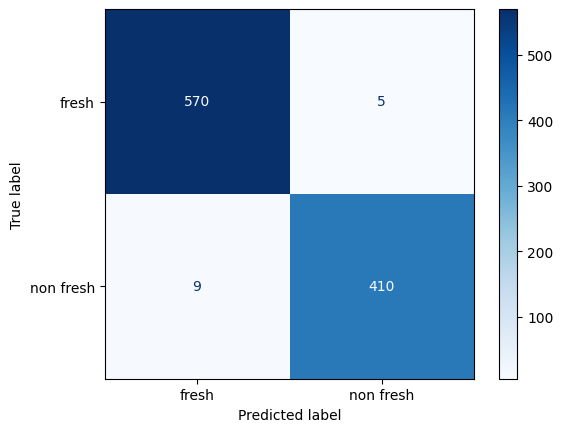

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generators.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Predicting using Model

In [ ]:
model = tf.keras.models.load_model("FishFreshness_2.h5")

input_tensor = model.layers[0].input
output_tensor = model.layers[-1].output

print("\nInput Tensor Shape:", input_tensor.shape)
print("Output Tensor Shape:", output_tensor.shape)



Input Tensor Shape: (None, 250, 250, 3)
Output Tensor Shape: (None, 1)


In [ ]:
def predict(model, image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(250, 250))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    img_array = img_array / 255.0

    prediction = model.predict(img_array)

    if prediction < 0.5:
        print("ikan termasuk dalam kategori segar")

    else:
        print("ikan termasuk dalam kategori tidak segar")

Saving DSC00535.JPG to DSC00535.JPG


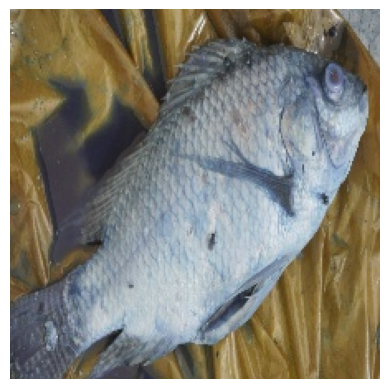



1/1 [==============================] - 0s 24ms/step
ikan termasuk dalam kategori tidak segar


In [ ]:
from PIL import Image

uploaded = files.upload()
latest_file = list(uploaded.keys())[-1]
latest_file_path = f"/content/{latest_file}"

image = Image.open(latest_file_path)
plt.imshow(image)
plt.axis('off')
plt.show()

print("\n")
predict(model, latest_file_path)

Saving ikan-segar.jpg to ikan-segar.jpg


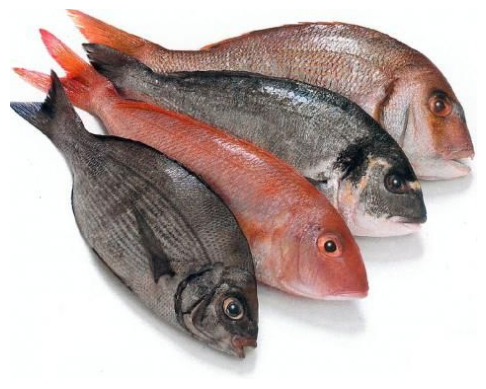



1/1 [==============================] - 0s 24ms/step
ikan termasuk dalam kategori segar


In [ ]:
from PIL import Image

uploaded = files.upload()
latest_file = list(uploaded.keys())[-1]
latest_file_path = f"/content/{latest_file}"

image = Image.open(latest_file_path)
plt.imshow(image)
plt.axis('off')
plt.show()

print("\n")
predict(model, latest_file_path)